In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
df=pd.read_csv('/content/sample_data/california_housing_train.csv')
df.info(verbose=True)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [74]:
df.describe(percentiles=[.25, .5, .75, .90])


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
90%,-117.240000,38.480000,46.000000,4677.100000,968.000000,2578.200000,893.000000,6.194900,379600.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [75]:
df.columns.tolist()


['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [76]:
sns.pairplot(df)


Output hidden; open in https://colab.research.google.com to view.

<Axes: >

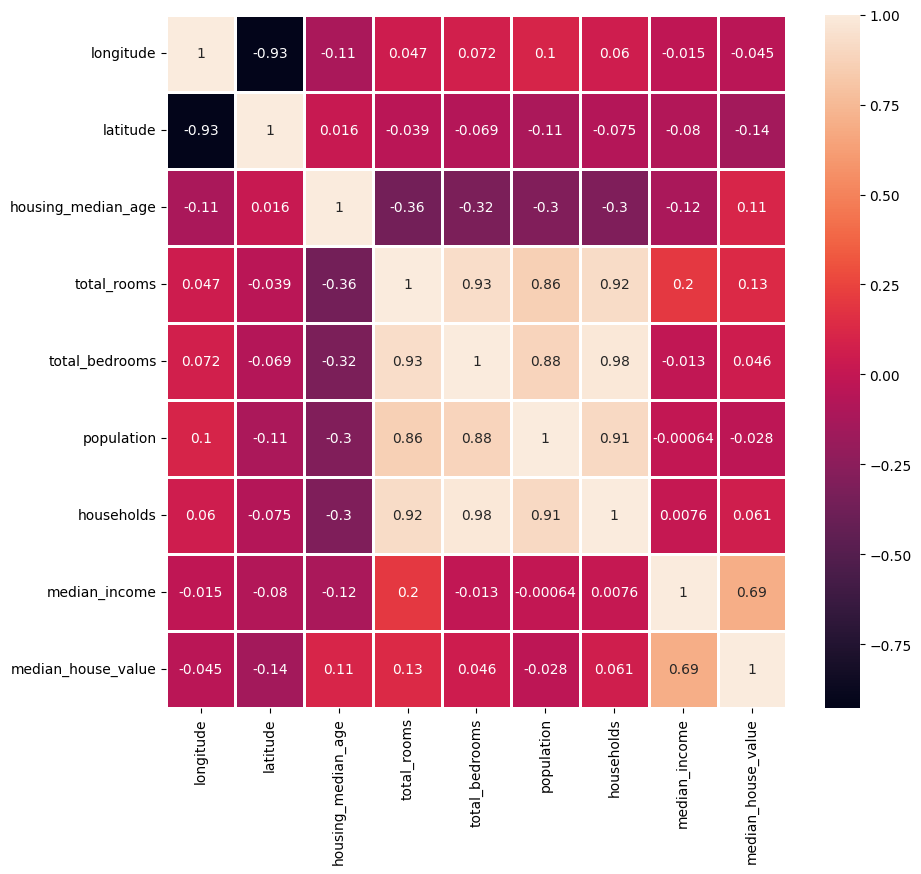

In [77]:

plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),annot=True,linewidth=2)

In [78]:
l_column= list(df.columns)
len_feature=len(l_column)
l_column

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [79]:
X=df[l_column[0:len_feature-2]]
Y=df[l_column[len_feature-2]]
X.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0


In [80]:
Y.head()

0    1.4936
1    1.8200
2    1.6509
3    3.1917
4    1.9250
Name: median_income, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
17000*0.8

13600.0

In [83]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=123)

In [84]:
X_train.shape

(13600, 7)

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [86]:
lm=LinearRegression()

In [87]:
lm.fit(X_train,Y_train)

LinearRegression()

In [88]:
print("The intercept term of linear model:",lm.intercept_)
print("The coefficient term of the linear model:",lm.coef_)

The intercept term of linear model: -51.22263582940269
The coefficient term of the linear model: [-0.68181171 -0.72329003 -0.01746476  0.00141376 -0.00699576 -0.00074985
  0.00190435]


In [89]:
cdf=pd.DataFrame(data=lm.coef_,index=X_train.columns,columns=["Coefficients"])
cdf

,Coefficients
longitude,-0.681812
latitude,-0.723290
housing_median_age,-0.017465
total_rooms,0.001414
total_bedrooms,-0.006996
population,-0.000750
households,0.001904


In [ ]:
n=X_train.shape[0]
k=Y_train.shape[1]
dfN=n-k
train_pred=lm.predict(X_train)
train_error=np.square(train_pred-Y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0,0]
for i in range(k):
  r=(sum_error/dfN)
  r=r/np.sum(np.square(X_train[
      list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))

  se[i]=np.sqrt(r)
cdf['std error']=se
cdf['t-statistic']=cdf['Co-efficient']